In [1]:
# Set seed for not randomabitlity
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
!pip install Pillow

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models


In [ ]:
pip install kaggle

In [3]:
kaggle_credentials = json.load(open("kaggle.json"))

In [4]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

In [5]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

100% 2.03G/2.04G [00:15<00:00, 248MB/s]
100% 2.04G/2.04G [00:15<00:00, 145MB/s]


In [ ]:
!ls

 drive	 kaggle.json  'plantvillage dataset'   plantvillage-dataset.zip   sample_data


In [6]:
#unzip the download dataset
with ZipFile("plantvillage-dataset.zip","r") as zip_ref:
  zip_ref.extractall()

In [7]:
#Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


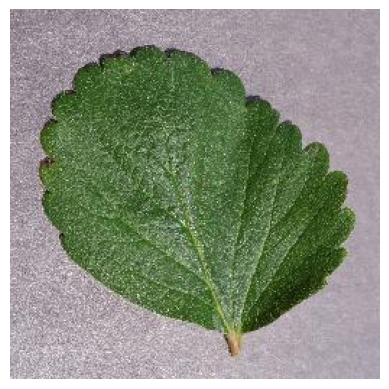

In [8]:
image_path = '/content/plantvillage dataset/color/Strawberry___healthy/01e591c9-e3e7-4edc-8211-13081f4d5e7a___RS_HL 1979.JPG'
img = mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
# Image Parameters
img_size = 224
batch_size = 32


In [10]:
#Image Data Generators
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [11]:
#Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [12]:
#Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


***Convonutional Neural Network***

In [13]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [15]:
#compiling the Model
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy'])

In [16]:
#Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

Epoch 1/10
1358/1358 [==============================] - 113s 80ms/step - loss: 0.9694 - accuracy: 0.7350 - val_loss: 0.4940 - val_accuracy: 0.8473
Epoch 2/10
1358/1358 [==============================] - 105s 77ms/step - loss: 0.2798 - accuracy: 0.9129 - val_loss: 0.4072 - val_accuracy: 0.8722
Epoch 3/10
1358/1358 [==============================] - 103s 76ms/step - loss: 0.1347 - accuracy: 0.9554 - val_loss: 0.4685 - val_accuracy: 0.8838
Epoch 4/10
1358/1358 [==============================] - 107s 79ms/step - loss: 0.0925 - accuracy: 0.9702 - val_loss: 0.5324 - val_accuracy: 0.8680
Epoch 5/10
1358/1358 [==============================] - 102s 75ms/step - loss: 0.0633 - accuracy: 0.9795 - val_loss: 0.9770 - val_accuracy: 0.8154
Epoch 6/10
1358/1358 [==============================] - 103s 76ms/step - loss: 0.0622 - accuracy: 0.9806 - val_loss: 0.7151 - val_accuracy: 0.8586
Epoch 7/10
1358/1358 [==============================] - 102s 75ms/step - loss: 0.0510 - accuracy: 0.9847 - val_loss: 0

In [17]:
#Model Evaluation
print("Evaluating Model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy :  {val_accuracy * 100:.5f}%")

Evaluating Model...
339/339 [==============================] - 18s 54ms/step - loss: 0.7209 - accuracy: 0.8756
Validation Accuracy :  87.56453%


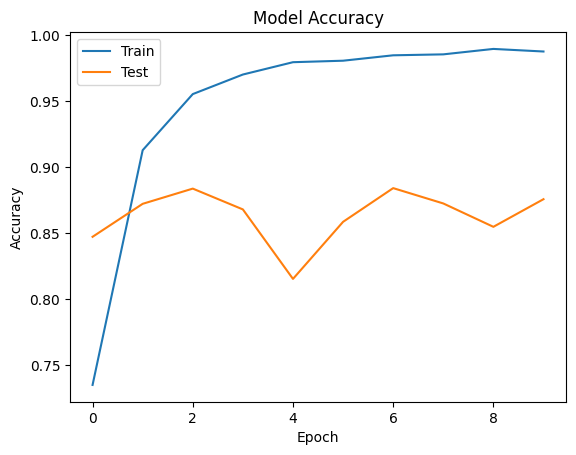

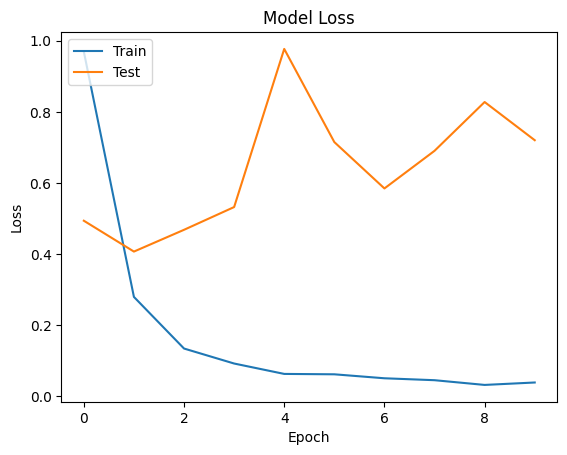

In [18]:
#Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name


In [20]:
#map class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [21]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [22]:
#saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [26]:
model.save('/content/drive/MyDrive/Trained Model/plant_disease_prediction_model.keras')

In [27]:
import pickle

In [28]:
with open('/content/drive/MyDrive/Trained Model/plant_disease_prediction_model','wb') as f:
  pickle.dump(model,f)